## Plotting fluxes and rates, April 2018 (Roger Revelle)

###  - Station P1 onshore (Station 33)
###  - Station P2 offshore (Station 32)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# read the data into pandas dataframes
# need to have a Pressure [dbar] column that's the same as Depth but with a decimal place

etnp_2018 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2018-fluxes.xlsx", index_col = 'sample id')

etnp_2018.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),Ctl bottle N2 production (nM/day),Babbin N production rates (nM N/day)
sample id,,,,,,,,,,,,,,
NaN,P2,2018,100,100,net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.4
1-30_151m_+P,P2,2018,151,151,cone,59.931793,12.312752,114.481766,NaN,NaN,10.0,4.07,4.2,21.1
1-30_151m_ctl,P2,2018,151,151,cone,NaN,58.149573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4-31_121m_+P,P2,2018,121,121,cone,140.234645,25.781553,142.191953,NaN,NaN,NaN,NaN,NaN,NaN
4-31_121m_ctl,P2,2018,121,121,cone,NaN,76.400943,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# keep only the rows Station = P2
# keep only rows Station P1

P2_2018 = etnp_2018.loc[(etnp_2018['Station'] == 'P2')]
P1_2018 = etnp_2018.loc[(etnp_2018['Station'] == 'P1')]

P2_2018.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),Ctl bottle N2 production (nM/day),Babbin N production rates (nM N/day)
sample id,,,,,,,,,,,,,,
NaN,P2,2018,100,100,net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.4
1-30_151m_+P,P2,2018,151,151,cone,59.931793,12.312752,114.481766,NaN,NaN,10.0,4.07,4.2,21.1
1-30_151m_ctl,P2,2018,151,151,cone,NaN,58.149573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4-31_121m_+P,P2,2018,121,121,cone,140.234645,25.781553,142.191953,NaN,NaN,NaN,NaN,NaN,NaN
4-31_121m_ctl,P2,2018,121,121,cone,NaN,76.400943,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import io
import requests
from pathlib import Path
import seaborn as sns

In [5]:
import ctd


castP2 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/RR18_Station32_P2_cast57.cnv")
downP2, upP2 = castP2.split()

# Because there are extra decimal places in Pressure column, make depSMignore (Depth), the index

downP2.reset_index(inplace=True)

# delete the scan, nbin, and flag columns

del downP2['scan']
#del downP2['nbin']
del downP2['flag']

downP2.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station32_P2_cast57.csv")

# read as a df again

downP2_fix = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station32_P2_cast57_fix.csv", index_col = 'Pressure [dbar]')

downP2_fix.head()

,timeS,longitude,latitude,depSMlignore,t090C,t190C,c0S/m,c1S/m,flSP,CStarAt0,...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
1.0,31.714,-106.97900,16.98438,1,26.8910,26.4595,5.392432,16.441289,0.10843,13.0223,...,0.0006,0,2.6468,34.1915,237.4446,22.1436,224.7598,5.6145,171.657,85.200
2.0,41.104,-106.97898,16.98437,2,26.8769,26.9744,5.414921,3.079106,0.10816,12.5543,...,-0.0001,0,2.4906,34.3619,-10.5195,22.2765,-22.7610,6.0677,185.486,92.149
3.0,49.914,-106.97897,16.98437,3,26.8888,26.8858,5.414856,5.429178,0.11793,12.3160,...,0.0000,0,2.7794,34.3524,34.4565,22.2657,22.3450,6.5317,199.672,99.211
4.0,51.789,-106.97896,16.98437,4,26.9041,26.9053,5.415320,5.435216,0.11185,12.3644,...,0.0000,0,2.7390,34.3440,34.4851,22.2546,22.3604,6.4483,197.126,97.966
5.0,53.221,-106.97896,16.98438,5,26.9042,26.9053,5.415237,5.431615,0.11244,12.3648,...,0.0000,0,2.7404,34.3431,34.4592,22.2539,22.3410,6.4510,197.209,98.006


In [6]:
# Merge station flux and station cast dataframes on their indices

P2_join = P2_2018.merge(downP2_fix,on='Pressure [dbar]')

# Save to csv and fill empty cells

P2_join.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/RR_2018_P2_cast_trap_join.csv", na_rep='NULL')

P2_join.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
0,P2,2018,100,100,net,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0.5143,34.7629,34.7617,25.9352,25.9343,0.0561,1.709,0.679
1,P2,2018,151,151,cone,59.931793,12.312752,114.481766,NaN,NaN,...,0.0,0,0.5094,34.7981,34.7984,26.2273,26.2277,0.0424,1.292,0.501
2,P2,2018,151,151,cone,NaN,58.149573,NaN,NaN,NaN,...,0.0,0,0.5094,34.7981,34.7984,26.2273,26.2277,0.0424,1.292,0.501
3,P2,2018,121,121,cone,140.234645,25.781553,142.191953,NaN,NaN,...,0.0,0,0.5109,34.7878,34.7878,26.0757,26.0752,0.0469,1.429,0.562
4,P2,2018,121,121,cone,NaN,76.400943,NaN,NaN,NaN,...,0.0,0,0.5109,34.7878,34.7878,26.0757,26.0752,0.0469,1.429,0.562


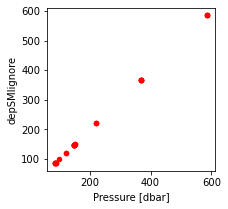

In [7]:
# Sanity check - does the Pressure (depth from trap file) match the Depth (from cast file)?

fig, ax = plt.subplots(figsize=(3, 3))

P2_join.plot(ax = ax, kind='scatter', x='Pressure [dbar]', y='depSMlignore', c='Red');

In [8]:
import ctd


castP1 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/RR18_Station33_P2_cast63.cnv")
downP1, upP1 = castP1.split()

# Because there are extra decimal places in Pressure column, make depSMignore (Depth), the index

downP1.reset_index(inplace=True)

downP1.round({"Pressure [dbar]":2}) 

# delete the scan, nbin, and flag columns

del downP1['scan']
#del downP1['nbin']
del downP1['flag']

downP1.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station33_P2_cast63.csv")

# read as a df again

downP1_fix = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station33_P2_cast63_fix.csv", index_col = 'Pressure [dbar]')

downP1_fix.head()

,timeS,longitude,latitude,depSMignore,t090C,t190C,c0S/m,c1S/m,flSP,CStarAt0,...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
11.0,48.916,-106.07344,20.26359,11,24.8934,24.8823,5.247989,5.246879,0.51056,12.4533,...,3.1615,0,2.7239,34.6398,34.6401,23.1018,23.1054,6.6139,202.020,97.302
12.0,81.918,-106.07344,20.26360,12,24.4635,24.4669,5.197751,5.198526,0.65410,12.4946,...,3.1191,0,2.7091,34.5962,34.5993,23.1985,23.1999,6.6103,201.892,96.512
13.0,83.108,-106.07344,20.26360,13,24.1590,24.1776,5.161954,5.164658,0.82750,12.5373,...,3.0768,0,2.7061,34.5625,34.5685,23.2638,23.2629,6.6641,203.520,96.769
14.0,85.629,-106.07344,20.26360,14,23.5448,23.5742,5.094538,5.097694,1.46740,12.5952,...,3.0105,0,2.6932,34.5293,34.5304,23.4196,23.4119,6.6268,202.350,95.194
15.0,87.937,-106.07344,20.26360,15,23.3026,23.3055,5.070765,5.071191,1.55150,12.6171,...,2.9420,0,2.6255,34.5368,34.5378,23.4958,23.4957,6.4407,196.653,92.134


In [9]:
# Merge station flux and station cast dataframes on their indices

P1_join = P1_2018.merge(downP1_fix,on='Pressure [dbar]')

# Save to csv and fill empty cells

P1_join.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/RR_2018_P1_cast_trap_join.csv", na_rep='NULL')

P1_join.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
0,P1,2018,50,50,net,NaN,6.703546,244.405574,NaN,NaN,...,1.0935,0,0.5197,34.7046,34.7041,25.5136,25.5131,0.0743,2.262,0.930
1,P1,2018,50,50,net,NaN,NaN,NaN,NaN,NaN,...,1.0935,0,0.5197,34.7046,34.7041,25.5136,25.5131,0.0743,2.262,0.930
2,P1,2018,50,50,net,NaN,NaN,NaN,NaN,NaN,...,1.0935,0,0.5197,34.7046,34.7041,25.5136,25.5131,0.0743,2.262,0.930
3,P1,2018,50,50,net,NaN,7.962744,NaN,NaN,NaN,...,1.0935,0,0.5197,34.7046,34.7041,25.5136,25.5131,0.0743,2.262,0.930
4,P1,2018,60,60,net,NaN,NaN,NaN,NaN,NaN,...,0.6501,0,0.5224,34.6952,34.6942,25.6050,25.6033,0.0906,2.759,1.124


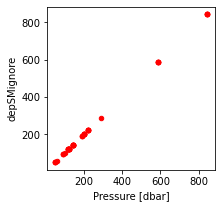

In [10]:
# Sanity check - does the Pressure (depth from trap file) match the Depth (from cast file)?

fig, ax = plt.subplots(figsize=(3, 3))

P1_join.plot(ax = ax, kind='scatter', x='Pressure [dbar]', y='depSMignore', c='Red');

In [11]:
def make_patch_spines_invisible(ax):
    
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

# P2

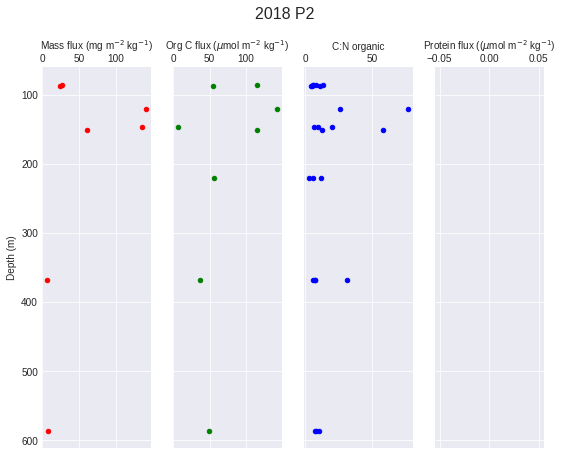

In [12]:
# Four-panel plot

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(9, 7))

fig2.suptitle('2018 P2', fontsize=16, y = 1.0)

# Mass flux

P2_2018.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P2_2018.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P2_2018.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P2_2018.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

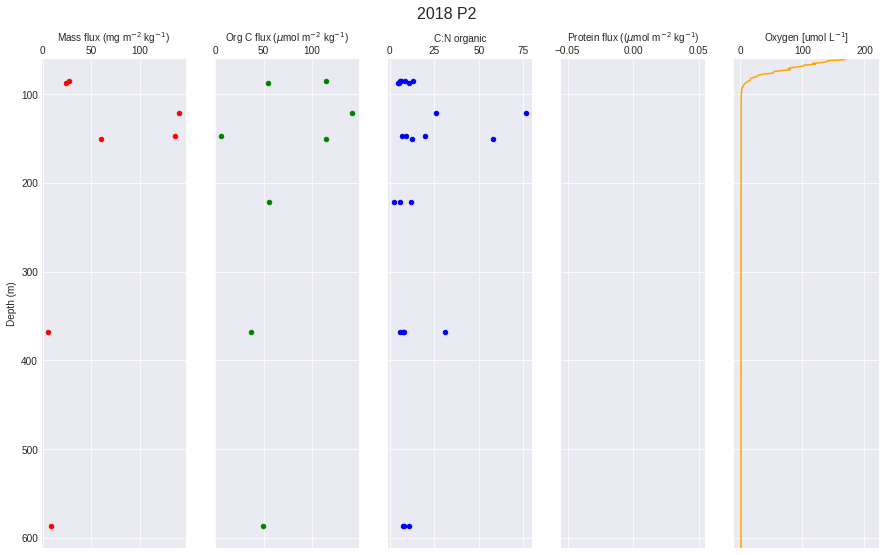

In [13]:
# Five-panel plot

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2018 P2', fontsize=16, y = 0.96)

# Mass flux

P2_2018.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P2_2018.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P2_2018.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P2_2018.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

downP2.plot(ax = ax6, kind='line', x='sbox0Mm/Kg', y='Pressure [dbar]', c='Orange') 
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax6.get_legend().remove()
ax6.grid(True)

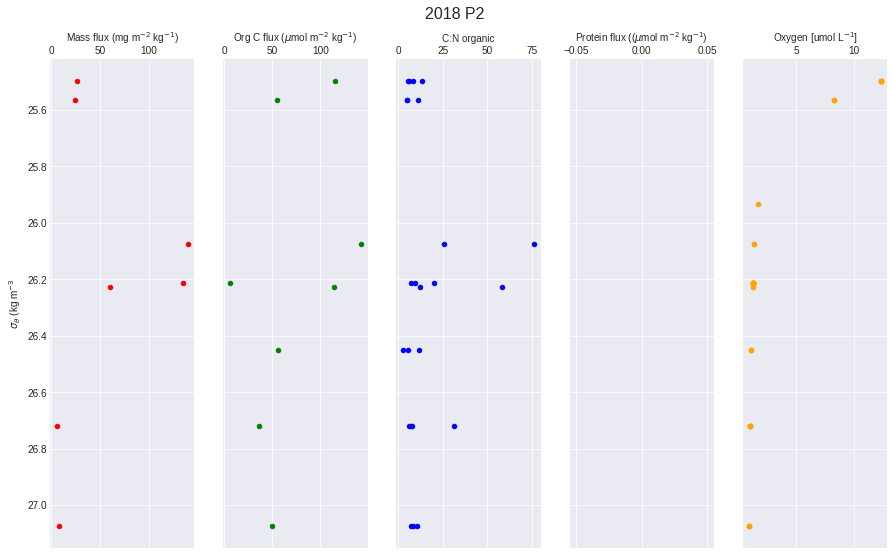

In [14]:
# plot flux with density using the merged cast and trap file

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2018 P2', fontsize=16, y = 0.96)

# Mass flux

P2_join.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y= 'sigma-�00', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$")
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P2_join.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y= 'sigma-�00', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P2_join.plot(ax = ax4, kind='scatter', x='C:N organic', y= 'sigma-�00', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P2_join.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y= 'sigma-�00', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

P2_join.plot(ax = ax6, kind='scatter', x='sbox0Mm/Kg', y= 'sigma-�00', c='Orange')
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax6.get_legend().remove()
ax6.grid(True);

# P1

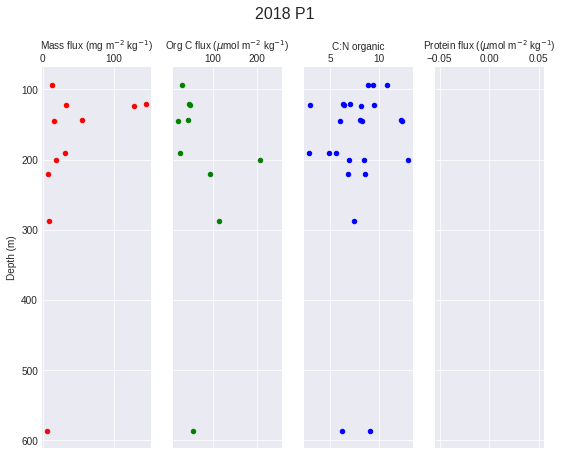

In [15]:
# Four-panel plot

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(9, 7))

fig2.suptitle('2018 P1', fontsize=16, y = 1.0)

# Mass flux

P1_2018.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P1_2018.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P1_2018.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P1_2018.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

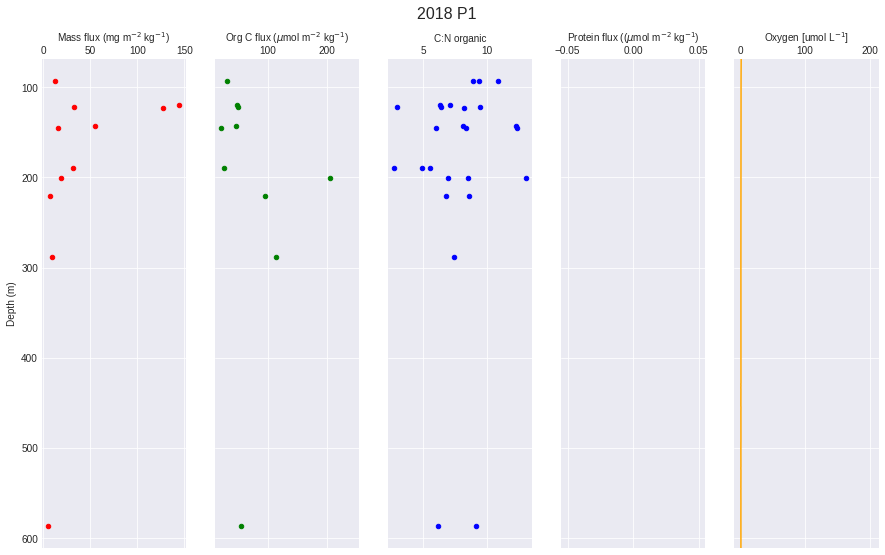

In [16]:
# Five-panel plot

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2018 P1', fontsize=16, y = 0.96)

# Mass flux

P1_2018.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P1_2018.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P1_2018.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P1_2018.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

downP1.plot(ax = ax6, kind='line', x='sbox0Mm/Kg', y='depSMignore', c='Orange') 
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax6.get_legend().remove()
ax6.grid(True)

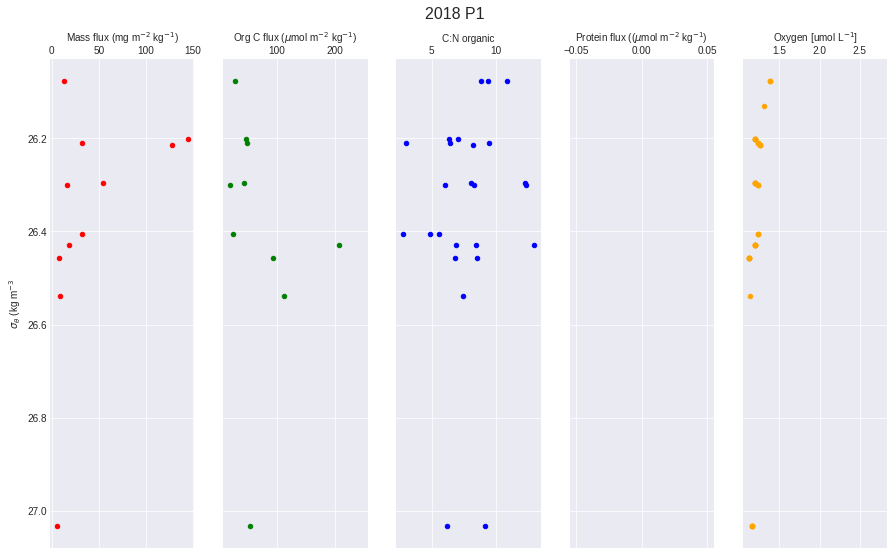

In [17]:
# plot flux with density using the merged cast and trap file

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2018 P1', fontsize=16, y = 0.96)

# Mass flux

P1_join.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y= 'sigma-�00', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$")
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P1_join.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y= 'sigma-�00', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P1_join.plot(ax = ax4, kind='scatter', x='C:N organic', y= 'sigma-�00', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P1_join.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y= 'sigma-�00', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

P1_join.plot(ax = ax6, kind='scatter', x='sbox0Mm/Kg', y= 'sigma-�00', c='Orange')
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax6.get_legend().remove()
ax6.grid(True);